In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [3]:
df=pd.read_csv('customer_segmentation.csv')

In [4]:
df.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


In [5]:
df.shape

(10127, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

In [8]:
corr=df.corr()

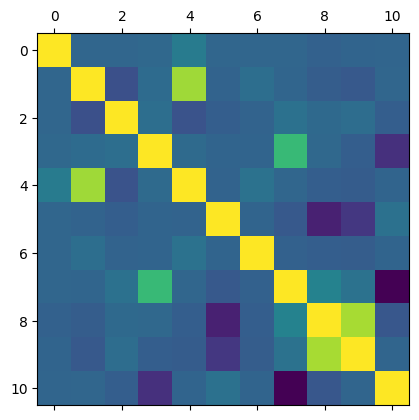

In [9]:
plt.matshow(corr)
plt.show()

In [11]:
corr

,customer_id,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
customer_id,1.000000,0.007613,0.006772,0.015787,0.134588,0.006907,0.005729,0.005708,-0.019692,-0.002961,0.000266
age,0.007613,1.000000,-0.122254,0.032922,0.788912,-0.010931,0.054361,0.002476,-0.046446,-0.067097,0.007114
dependent_count,0.006772,-0.122254,1.000000,0.051620,-0.103062,-0.039076,-0.010768,0.068065,0.025046,0.049912,-0.037135
estimated_income,0.015787,0.032922,0.051620,1.000000,0.027628,-0.007181,-0.002703,0.515863,0.015861,-0.039988,-0.277532
months_on_book,0.134588,0.788912,-0.103062,0.027628,1.000000,-0.009203,0.074164,0.007507,-0.038591,-0.049819,-0.007541
total_relationship_count,0.006907,-0.010931,-0.039076,-0.007181,-0.009203,1.000000,-0.003675,-0.071386,-0.347229,-0.241891,0.067663
months_inactive_12_mon,0.005729,0.054361,-0.010768,-0.002703,0.074164,-0.003675,1.000000,-0.020394,-0.036982,-0.042787,-0.007503
credit_limit,0.005708,0.002476,0.068065,0.515863,0.007507,-0.071386,-0.020394,1.000000,0.171730,0.075927,-0.482965
total_trans_amount,-0.019692,-0.046446,0.025046,0.015861,-0.038591,-0.347229,-0.036982,0.171730,1.000000,0.807192,-0.083034
total_trans_count,-0.002961,-0.067097,0.049912,-0.039988,-0.049819,-0.241891,-0.042787,0.075927,0.807192,1.000000,0.002838


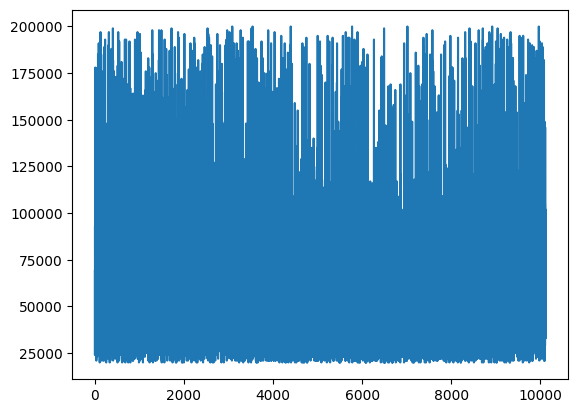

In [21]:
plt.plot(df['estimated_income'])
plt.show()

In [37]:
dfmodif=df.copy()
dfmodif['gender']=dfmodif['gender'].apply(lambda x: 1 if x=='M' else 0)


In [38]:
dfmodif['education_level']=dfmodif['education_level'].apply(lambda x: 0 if x=='Uneducated' else 1 if x=='High School' else 2 if x=='College' else 3 if x=='Graduate' else 4 if x=='Post-Graduate' else 5)

In [39]:
dfmodif.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,1,3,1,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,0,5,3,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,1,3,3,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,0,4,1,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,1,3,0,Married,65000,21,5,1,4716.0,816,28,0.000


In [46]:
dfmodif=pd.get_dummies(data=dfmodif, prefix=['marital_status'], drop_first='True')

In [57]:
dfnew=dfmodif.drop('customer_id', axis=1)

In [61]:
scaler=StandardScaler()
scaler.fit(dfnew)
df_scaled = scaler.transform(dfnew)

In [62]:
df_scaled=pd.DataFrame(df_scaled, columns=dfnew.columns)

In [63]:
df_scaled.head()

,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Married,marital_status_Single,marital_status_Unknown
0,-0.165406,1.059956,0.503368,-0.752211,0.175810,0.384621,0.763943,-1.327136,0.446622,-0.959707,-0.973895,-0.775882,1.077338,-0.798507,-0.282609
1,0.333570,-0.943436,2.043199,0.662787,-0.967166,1.010715,1.407306,-1.327136,-0.041367,-0.916433,-1.357340,-0.616276,-0.928214,1.252337,-0.282609
2,0.583058,1.059956,0.503368,0.662787,0.785397,0.008965,0.120579,-1.327136,-0.573698,-0.740982,-1.911206,-0.997155,1.077338,-0.798507,-0.282609
3,-0.789126,-0.943436,1.273283,-0.752211,-0.636973,-0.241473,-0.522785,1.641478,-0.585251,-0.951758,-1.911206,1.759686,-0.928214,-0.798507,3.538459
4,-0.789126,1.059956,0.503368,-1.459710,0.074212,-1.869317,0.763943,-1.327136,-0.430877,-1.056263,-1.570365,-0.997155,1.077338,-0.798507,-0.282609


In [65]:
inertias=[]
for k in range(1,11):
    model=KMeans(n_clusters=k)
    clusters=model.fit_predict(df_scaled)
    inertias.append(model.inertia_)
    

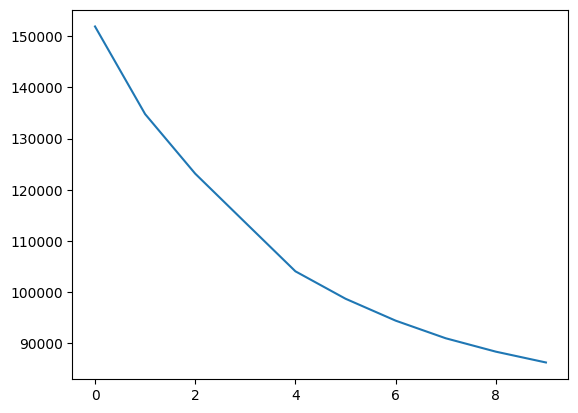

In [67]:
plt.plot(inertias)
plt.show()

In [68]:
#we gnna use k=4
model4=KMeans(n_clusters=4)
clusters=model4.fit_predict(df_scaled)

In [70]:
df['cluster']=clusters

In [72]:
#sns.scatterplot(data=df, x='age', y='months_on_book', hue='clusters')
#plt.show()
df.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,cluster
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061,1
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105,2
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000,1
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760,0
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000,1
